### Import

In [42]:
import numpy as np
import time
import matplotlib.pyplot as plt
import sys
import os
caffe_root = '/Users/gijs/Various/caffe/'
sys.path.insert(0, caffe_root + 'python')
import caffe
import matplotlib.image as mpimg

from sklearn.neighbors import KDTree
from tqdm import tqdm
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'

### Find and load Network

In [110]:
caffe.set_mode_cpu()
model_weights = '../../data/objectNet/Uganda/net2/snapshot_iter_3000.caffemodel'
model_def = '../../data/objectNet/Uganda/net2/deploy.prototxt'
net = caffe.Net(model_def,model_weights,caffe.TEST)

### Setup the net

In [111]:
#Load Actual Mean Image
meanimage = caffe.io.load_image('../../data/objectNet/Uganda/net2/objectNet.jpg')
mymu = np.mean(meanimage,axis=0)
mymu = np.mean(mymu,axis=0) * 255
mymu = mymu[::-1]

#Create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))  
transformer.set_mean('data', mymu)            
transformer.set_raw_scale('data', 255)      
transformer.set_channel_swap('data', (2,1,0))  

### Find the images

In [112]:
#Get Image List
filelist = []
cats = []
for root, dirs, files in os.walk("../../data/objectNet/Uganda/val/", topdown=False):
    elements = root.split('/')
    category = elements[-1]
    for m,myfile in enumerate(files):
        filename = root + '/' + myfile
        cats.append(category)
        filelist.append(filename)

### Classify

In [113]:
#Pick Random Image
nIm = 100
mylabels = []
usedfiles = []
net.blobs['data'].reshape(nIm,3,227,227)
X = np.zeros((3200,4096))
for j in tqdm(range(32)):
    for i in range(nIm):

        #Hand over data to network
        index = (j*100)+i
        image = caffe.io.load_image(filelist[index])
        usedfiles.append(filelist[i])
        transformed_image = transformer.preprocess('data', image)
        net.blobs['data'].data[i,:,:,:] = transformed_image
        mylabels.append(cats[i])

    #Run network
    output = net.forward()

    #Output
    ac = net.blobs['fc7'].data
    index = j*100
    X[index:index+100,:] = ac

In [114]:
tree = KDTree(X, leaf_size=2)

(1, 4096)
../../data/objectNet/Uganda/val/structure/2663.png
../../data/objectNet/Uganda/val/structure/10040.png
../../data/objectNet/Uganda/val/structure/6488.png
../../data/objectNet/Uganda/val/structure/17316.png
../../data/objectNet/Uganda/val/structure/6845.png
../../data/objectNet/Uganda/val/structure/17357.png
../../data/objectNet/Uganda/val/structure/13673.png
../../data/objectNet/Uganda/val/structure/226.png
../../data/objectNet/Uganda/val/structure/5118.png
../../data/objectNet/Uganda/val/structure/3614.png
../../data/objectNet/Uganda/val/structure/17406.png
../../data/objectNet/Uganda/val/structure/11059.png
../../data/objectNet/Uganda/val/structure/2111.png
../../data/objectNet/Uganda/val/structure/15155.png
../../data/objectNet/Uganda/val/structure/12720.png
../../data/objectNet/Uganda/val/structure/1059.png


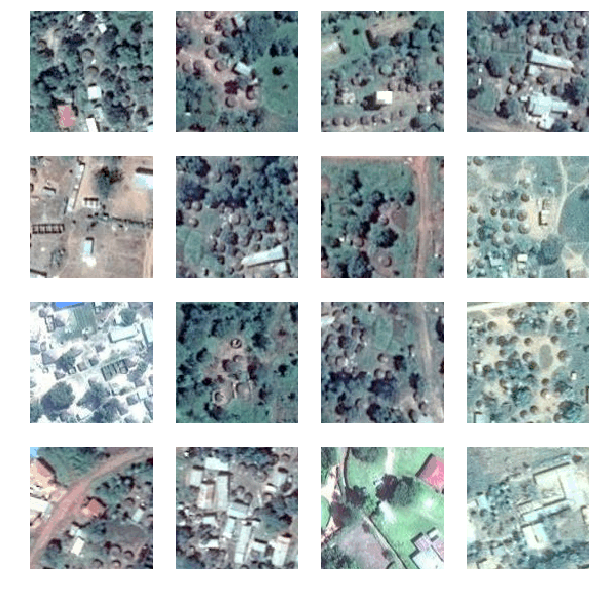

In [207]:
c = np.zeros((1,4096))
val = np.random.randint(3200)
for i in range(1):
    c[0,:] = X[val,:]
    print c.shape
    e
    for j in range(0,16):
        plt.subplot(4,4,j+1);
        img = mpimg.imread(filelist[ind[0][j]]);
        print filelist[ind[0][j]]
        plt.imshow(img);
        plt.axis('off');